In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set()
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('dota_hero_stats.csv')

In [4]:
df = df.loc[:, 'attack_type':]

In [5]:
df = df.set_index('id')

In [6]:
df.head()

,attack_type,legs,localized_name,name,primary_attr,roles
id,,,,,,
1,Melee,2,Anti-Mage,npc_dota_hero_antimage,agi,"['Carry', 'Escape', 'Nuker']"
2,Melee,2,Axe,npc_dota_hero_axe,str,"['Initiator', 'Durable', 'Disabler', 'Jungler']"
3,Ranged,4,Bane,npc_dota_hero_bane,int,"['Support', 'Disabler', 'Nuker', 'Durable']"
4,Melee,2,Bloodseeker,npc_dota_hero_bloodseeker,agi,"['Carry', 'Disabler', 'Jungler', 'Nuker', 'Ini..."
5,Ranged,2,Crystal Maiden,npc_dota_hero_crystal_maiden,int,"['Support', 'Disabler', 'Nuker', 'Jungler']"


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 117 entries, 1 to 129
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   attack_type     117 non-null    object
 1   legs            117 non-null    int64 
 2   localized_name  117 non-null    object
 3   name            117 non-null    object
 4   primary_attr    117 non-null    object
 5   roles           117 non-null    object
dtypes: int64(1), object(5)
memory usage: 6.4+ KB


In [38]:
df.isnull().sum()

attack_type       0
legs              0
localized_name    0
name              0
primary_attr      0
roles             0
dtype: int64

In [7]:
df.describe()

,legs
count,117.000000
mean,2.085470
std,1.156486
min,0.000000
25%,2.000000
50%,2.000000
75%,2.000000
max,8.000000


In [22]:
df.legs.nunique()

5

In [21]:
df.legs.unique()

array([2, 4, 0, 6, 8], dtype=int64)

In [8]:
df.describe(include='object')

,attack_type,localized_name,name,primary_attr,roles
count,117,117,117,117,117
unique,2,117,117,3,100
top,Ranged,Axe,npc_dota_hero_visage,int,"['Carry', 'Disabler', 'Initiator', 'Durable', ..."
freq,61,1,1,42,3


In [13]:
df.attack_type.value_counts()

Ranged    61
Melee     56
Name: attack_type, dtype: int64

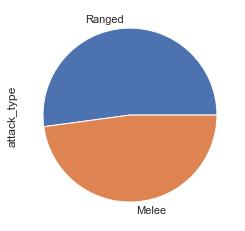

In [12]:
df.attack_type.value_counts().plot.pie();

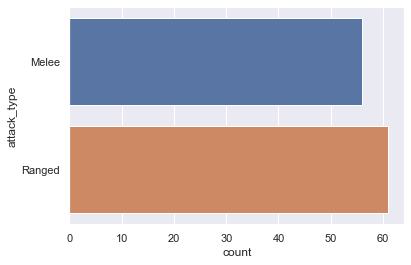

In [15]:
sns.countplot(data=df, y='attack_type');

In [17]:
df.primary_attr.value_counts()

int    42
str    38
agi    37
Name: primary_attr, dtype: int64

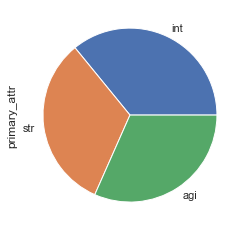

In [19]:
df.primary_attr.value_counts().plot.pie();

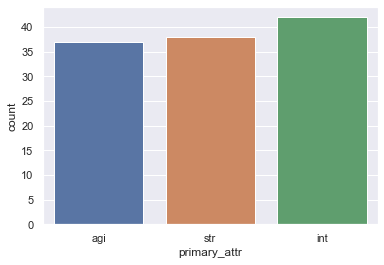

In [20]:
sns.countplot(data=df, x='primary_attr');

In [36]:
df.pivot_table('name', 'attack_type', 'primary_attr', aggfunc='count')

primary_attr,agi,int,str
attack_type,,,
Melee,19,2,35
Ranged,18,40,3


In [39]:
df.pivot_table('legs', 'attack_type', 'primary_attr')

primary_attr,agi,int,str
attack_type,,,
Melee,2.315789,2.00,2.171429
Ranged,1.444444,2.25,1.333333


In [16]:
df.head(1)

,attack_type,legs,localized_name,name,primary_attr,roles
id,,,,,,
1,Melee,2,Anti-Mage,npc_dota_hero_antimage,agi,"['Carry', 'Escape', 'Nuker']"
